# 状態空間モデル

## 1. 一般的な状態空間モデルの定義

　最初に抽象的ではあるが一般的な状態空間モデルの定義を行う.

### 1.1 定義 (状態空間モデル)

(tsa:ssm:definition:definition:definition)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        状態空間モデルの仮定
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　**状態空間モデル** (state space model) とは $\mathbb{R}^m$ 上の値をとる時系列 $\alpha_t \ (t=0, 1, \dots)$ と $\mathbb{R}^p$ 上の値をとる時系列 $y_t \ (t = 1, 2, \dots)$ からなり以下の 2 仮定を満たすモデルを指す.
1. 状態 $\alpha_t$ はマルコフ連鎖である.
1. $\alpha_t$ の条件の下で $y_t$ は独立であり, $y_t$ は $\alpha_t$ のみに依存する.
    
</div>

　方程式によって表現すると以下のように書ける.

(tsa:ssm:definition:definition:equation-expression)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        状態空間モデルの方程式表現
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　$F(\cdot), G(\cdot)$ を任意の関数とし, $\varepsilon_t$ を観測誤差, $\eta_t$ を状態誤差と呼ばれ, 以下のように表現される.  

$$
    \begin{align*}
        y_t &= F(\alpha_t, \varepsilon_t) \\
        \alpha_t &= G(\alpha_{t-1}, \eta_t)
    \end{align*}
$$

このとき上式を**観測方程式** (observation equation), 下式を**状態方程式** (state equation) または **システム方程式** (system equation) という.
    
</div>

　状態空間モデルにおいて状態 $\alpha_t$ と観測値 $y_t$ の関係性は以下の**非巡回的有向グラフ** (directed acyclic graph, DAG) によって表現される関係にある.

:::{figure-md} ssm-dag

<img src="../images/ssm-dag.png" alt="ssm-dag" class="bg-primary mb-1" width="600px">

状態変数と観測値の関係

:::

以下では状態空間モデルの仮定をDAG並びに確率分布の観点で具体化する. 条件付分布については [3. 周辺分布と条件付分布](dist:mdist:marginal-conditional) を参照のこと.

(tsa:ssm:definition:definition:markov)=
#### 状態 $\alpha_t$ はマルコフ連鎖である

　下記のように $\alpha_t$ は $\alpha_{t-1}$ が確定するとその確率分布も定まる. すなわち

$$
    \begin{align*}
        f(\alpha_t | \alpha_{0:t-1}, y_{1:t-1}) = f(\alpha_t | \alpha_{t-1}).
    \end{align*}
$$

:::{figure-md} ssm-dag-markov

<img src="../images/ssm-dag-markov.png" alt="ssm-dag-markov" class="bg-primary mb-1" width="600px">

DAGによるマルコフ性 (網掛けの変数が与えられると線で囲まれた変数が独立となる)

:::

(tsa:ssm:definition:definition:cond-independent)=
#### 状態 $\alpha_t$ の条件の下で $y_t$ は独立で $y_t$ は $\alpha_t$ のみに依存する


　下記のように $\alpha_t$ が確定すると $y_t$ の確率分布も定まる. すなわち

$$
    \begin{align*}
        f(y_t | \alpha_{0:t}, y_{1:t-1}) = f(y_t | \alpha_t).
    \end{align*}
$$

:::{figure-md} ssm-dag-cond-independent

<img src="../images/ssm-dag-cond-independent.png" alt="ssm-dag-cond-independent" class="bg-primary mb-1" width="600px">

DAGに観測値の条件付独立性 (網掛けの変数が与えられると線で囲まれた変数が独立となる)

:::


### 1.2 定理 (状態空間モデルの同時分布)

(tsa:ssm:definition:join-dist)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        状態空間モデルの同時分布
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　状態空間モデルの同時分布 $f(\alpha_{0:n}, y_{1:n})$ は以下のように表現できる.
    
$$
    \begin{align*}
        f(\alpha_{0:n}, y_{1:n}) = f(x_0) \prod_{t=1}^{n}{f(y_t | x_t)f(x_t | x_{t-1})}
    \end{align*}
$$

上記において初期状態に関する事前分布 $f(x_0)$, 観測方程式 (観測値と状態に関する方程式) の確率分布 $f(y_t | x_t)$, 状態方程式 (状態に関する方程式) の確率分布 $f(x_t | x_{t-1})$ によって決まることが分かる.
    
</div>

<u>証明</u>

　[条件付分布による乗法定理](conditional_distribution) を用いて計算を進める.

$$
    \begin{align*}
        f(\alpha_{0:n}, y_{1:n}) 
            &= f(\alpha_{0:n}, y_n, y_{1:n-1}) \\
            &= f(y_n | \alpha_{0:n}, y_{1:n-1}) f(\alpha_{0:n}, y_{1:n-1}) \quad (\because \ \text{条件付分布の乗法定理}) \\
            &= f(y_n | \alpha_{0:n}, y_{1:n-1}) f(\alpha_n, \alpha_{0:n-1}, y_{1:n-1}) \\
            &= f(y_n | \alpha_{0:n}, y_{1:n-1}) f(\alpha_n | \alpha_{0:n-1}, y_{1:n-1}) f(\alpha_{0:n-1}, y_{1:n-1}) \quad (\because \ \text{条件付分布の乗法定理})
    \end{align*}
$$

つまり $f(\alpha_{0:n}, y_{1:n})$ から $f(\alpha_{0:n-1}, y_{1:n-1})$ に変換すると $f(y_n | \alpha_{0:n}, y_{1:n-1}) f(\alpha_n | \alpha_{0:n-1}, y_{1:n-1})$ が係数部分にかけられる. このことを繰り返し $f(\alpha_{0:1}, y_1)$ まで行うと

$$
    \begin{align*}
        f(\alpha_{0:n}, y_{1:n}) 
            &= \biggl( \prod_{t=2}^{n}{ f(y_t | \alpha_{0:t}, y_{1:t-1}) f(\alpha_t | \alpha_{0:t-1}, y_{1:t-1}) } \biggr) f(\alpha_{0:1}, y_1) \\
            &= \biggl( \prod_{t=2}^{n}{ f(y_t | \alpha_{0:t}, y_{1:t-1}) f(\alpha_t | \alpha_{0:t-1}, y_{1:t-1}) } \biggr) f(y_1 | \alpha_{0:1}) f(\alpha_1 | \alpha_0) f(\alpha_0) \quad (\because \ \text{条件付分布の乗法定理})
    \end{align*}
$$

状態空間モデルの仮定より $f(y_t | \alpha_{0:t}, y_{1:t-1}) = f(y_t | \alpha_t)$, $f(\alpha_t | \alpha_{0:t-1}, y_{1:t-1}) = f(\alpha_t | \alpha_{t-1})$ より

$$
    \begin{align*}
        f(\alpha_{0:n}, y_{1:n}) 
            &= \biggl( \prod_{t=2}^{n}{ f(y_t | \alpha_t) f(\alpha_t | \alpha_{t-1}) } \biggr) f(y_1 | \alpha_{0:1}) f(\alpha_1 | \alpha_0) f(\alpha_0) \\
            &= f(\alpha_0) \prod_{t=1}^{n}{ f(y_t | \alpha_t) f(\alpha_t | \alpha_{t-1}) }.
    \end{align*}
$$

## 2. 一般的な状態空間モデルの逐次的求解

　状態空間モデルは[前述](tsa:ssm:definition:definition:equation-expression)した通り, 以下のように表現できる. ただし, 状態変数と観測値以外の未知パラメータ (誤差項を含む) は $\theta$ にまとめている.
 
$$
    \begin{align*}
        y_t &= F(\alpha_t, \theta) \\
        \alpha_t &= G(\alpha_{t-1}, \theta)        
    \end{align*}
$$

このとき状態空間モデルの逐次的解析として以下のステップで構成される.

1. パラメータ $\theta$ の推定
1. 状態の推定および観測値の予測


### 2.1 プロシージャ (パラメータ $\theta$ の推定)

#### 2.1.1 命題 (対数尤度関数)

(tsa:ssm:recursive:loglikelihood)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        状態空間モデルの対数尤度関数
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　全体の尤度関数を $L(y_{1:n};\theta)$ とすれば対数尤度関数は以下で表現される.
    
$$
    \begin{align*}
        \log{L(y_{1:n};\theta)} = \sum_{t=1}^{n}{\log{L(y_t | y_{1:t-1} ; \theta)}}
    \end{align*}
$$
    
</div>

<u>証明</u>
 
$$
    \begin{align*}
        L(y_{1:n};\theta) &= L(y_n | y_{1:n-1};\theta)L(y_{1:n-1};\theta) \\
                          &= L(y_n | y_{1:n-1};\theta)L(y_{n-1} | y_{1:n-2};\theta)L(y_{1:n-2};\theta) \\
                          &\cdots \\
                          &= \prod_{t=1}^{n}{L(y_t|y_{1:t-1};\theta)} \quad (\textstyle ただし \ L(y_1|y_{1:0};\theta) = L(y_1; \theta) \ とする)
    \end{align*}
$$

となり上記に対数を取れば求められる.  
　この対数尤度関数を用いてパラメータを推定する.

#### 2.1.2 命題 (パラメータを確率変数とは考えない場合の推定)

(tsa:ssm:recursive:mle)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        パラメータを確率変数とは考えない場合のパラメータ推定
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　状態空間モデルにおけるパラメータ推定値 $\hat{\theta}$ は**最尤推定法** (maximum likelihood estimation; MLE) によって求められる.
    
$$
    \begin{align*}
        \hat{\theta} =
            \underset{\theta}{\operatorname{argmax}} \log{L(y_{1:n};\theta)} = \underset{\theta}{\operatorname{argmax}} \sum_{t=1}^{n}{\log{L(y_t | y_{1:t-1} ; \theta)}}
    \end{align*}
$$
    
</div>

　具体的な数値計算の手法としては

- 準ニュートン法 (quasi-Newton method)
- EMアルゴリズム (EM; expectation maximization)

で実施.

#### 2.1.3 命題 (パラメータを確率変数として考える場合の推定)

(tsa:ssm:recursive:mle-map)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        パラメータを確率変数として考える場合のパラメータ推定
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　状態空間モデルにおけるパラメータ推定値 $\hat{\theta}$ は**最大事後確率推定** (maximum a posteriori estimation; MAP) によって求められる.
    
$$
    \begin{align*}
        \hat{\theta} =
            \underset{\theta}{\operatorname{argmax}} \log{L(\theta | y_{1:t})} \propto 
            \underset{\theta}{\operatorname{argmax}} \{ \log{L(y_{1:t} | \theta)} + \log{L(\theta)} \}
    \end{align*}
$$
    
</div>

### 2.2 プロシージャ (状態の推定および観測値の予測)

状態の推定および観測値の予測において

1. **フィルタリング** (filtering) : 時点 $t$ までの観測値 $y_{1:t}$ に基づいて時点 $t$ の状態 $\alpha_t$ を推定
1. **平滑化** (smoothing) : 与えられたすべての観測値 $y_{1:n}$ を用いて各時点の状態 $\alpha_1, \dots, \alpha_n$ を推定
1. **予測** (forecasting) : フィルタリングの最終時点 $t=n$ から先の時点へと進めた将来の状態, 観測値に対する予測

の 3 問題が存在する. さらに言い換えると  

1. **フィルタリング** (filtering) : フィルタリング分布 $f(\alpha_t | y_{1:t})$ を推定
1. **平滑化** (smoothing) : 平滑化分布 $f(\alpha_t | y_{1:n}) \ (1 \leq t \leq n)$ を推定
1. **予測** (forecasting) : 予測分布 $f(\alpha_{t+k} | y_{1:t})  \ (k \geq 1)$ を予測

とも言える.

#### 2.2.1 命題 (フィルタリング分布の推定)

(tsa:ssm:recursive:filtering)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        フィルタリング
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　**フィルタリング** (filtering) によって分布 $f(\alpha_{t-1}|y_{1:t-1})$ を用いて $f(\alpha_{t-1}|y_{1:t-1})$ を取得するには以下の漸化式による計算を実施すればよい.
    
(a) **1期先予測分布** (one-step ahead predict distribution) $f(\alpha_t | y_{1:t-1})$ を予測.
    
$$
    \begin{align*}
        f(\alpha_t | y_{1:t-1}) = \int {f(\alpha_t | \alpha_{t-1}) f(\alpha_{t-1} | y_{1:t-1}) d\alpha_{t-1} }
    \end{align*}
$$

    
(b) **1期先予測尤度** (one-step ahead predict likelihood) $f(y_t | y_{1:t-1})$ を予測.
    
$$
    \begin{align*}
        f(y_t | y_{1:t-1}) = \int {f(y_t | \alpha_{t}) f(\alpha_{t} | y_{1:t-1}) d\alpha_{t} }
    \end{align*}
$$

    
(c) データ $y_t$ を用いて**フィルタリング分布** (filtering distribution) $f(x_t | y_{1:t})$ を推定.
    
$$
    \begin{align*}
        f(\alpha_t | y_{1:t}) = f(\alpha_t | y_{1:t-1}) \frac{f(y_t | \alpha_{t})}{f(y_t | y_{1:t-1})}
    \end{align*}
$$
    
</div>

<u>証明</u>

　(a)~(c) の数式を導出する. (c) については[乗法定理](conditional_distribution)より
 
$$
    \begin{align*}
        f( \alpha_{t} | y_{1:t} ) 
            &= f( \alpha_{t} | y_{t}, y_{1:t-1} ) \\
            &= \frac{ f( \alpha_{t}, y_t | y_{1:t-1} ) }{ f( y_{t} | y_{1:t-1} ) } \quad (\because \ \textstyle 乗法定理) \\
            &= \frac{ f( y_{t} | \alpha_{t}, y_{1:t-1} ) f( \alpha_{t} | y_{1:t-1} ) }{ f( y_{t} | y_{1:t-1} ) } \quad (\because \ \textstyle 乗法定理)
    \end{align*}
$$

上式は [$\alpha_t$ が与えられた条件の下で $y_t$ と $y_{1:t-1}$ は独立である](tsa:ssm:definition:definition:cond-independent)ことを利用して $f( y_{t} | \alpha_{t}, y_{1:t-1} ) = f( y_{t} | \alpha_{t} )$ となり与式が導出される.

　(a) について[周辺化](marginal_distribution)を踏まえ
 
$$
    \begin{align*}
        f( \alpha_{t} | y_{1:t-1} ) 
            &= \int { f( \alpha_{t}, \alpha_{t-1} | y_{1:t-1} ) d\alpha_{t-1} } \quad (\because \ \textstyle 周辺化) \\
            &= \int { f( \alpha_{t} | \alpha_{t-1}, y_{1:t-1} ) f( \alpha_{t-1} | y_{1:t-1} )  d\alpha_{t-1} } \quad (\because \ \textstyle 乗法定理)
    \end{align*}
$$

上式について [$\alpha_t$ のマルコフ性](tsa:ssm:definition:definition:markov)を利用して $f( \alpha_{t} | \alpha_{t-1}, y_{1:t-1} ) = f( \alpha_{t} | \alpha_{t-1} )$ となり与式が導出される.

　最後に (b) についても[周辺化](marginal_distribution), [乗法定理](conditional_distribution)および[$\alpha_t$ が与えられた条件の下で $y_t$ と $y_{1:t-1}$ は独立である](tsa:ssm:definition:definition:cond-independent)ことを利用して導出ができる.
 
$$
    \begin{align*}
        f( y_{t} | y_{1:t-1} ) 
            &= \int { f( y_{t}, \alpha_{t} | y_{1:t-1} ) d\alpha_{t} } \quad (\because \ \textstyle 周辺化) \\
            &= \int { f( y_{t} | \alpha_{t}, y_{1:t-1} ) f( \alpha_{t} | y_{1:t-1} ) d\alpha_{t} } \quad (\because \ \textstyle 乗法定理) \\
            &= \int { f( y_{t} | \alpha_{t} ) f( \alpha_{t} | y_{1:t-1} ) d\alpha_{t} } \quad (\because \ \textstyle 条件付独立性)
    \end{align*}
$$

#### 2.2.2 命題 (予測分布の予測)

(tsa:ssm:recursive:forecasting)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        予測
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　**予測** (forecasting) によって分布 $f(\alpha_{t}|y_{1:t})$ を用いて $f(\alpha_{t+k}|y_{1:t})$ を取得するプロシージャは以下の漸化式を更新すればよい.
    
$$
    \begin{align*}
        f(\alpha_{t+k} | y_{1:t}) = \int {f(\alpha_{t+k} | \alpha_{t+k-1}) f(\alpha_{t+k-1} | y_{1:t}) d\alpha_{t+k-1} }
    \end{align*}
$$
    
</div>

<u>証明</u>

　[周辺化](marginal_distribution), [乗法定理](conditional_distribution), [$\alpha_t$ のマルコフ性](tsa:ssm:definition:definition:markov)を利用して　

$$
    \begin{align*}
        f(\alpha_{t+k} | y_{1:t}) 
            &= \int { f( \alpha_{t+k}, \alpha_{t+k-1} | y_{1:t}) d \alpha_{t+k-1} } \quad (\because \ \textstyle 周辺化) \\
            &= \int { f( \alpha_{t+k} | \alpha_{t+k-1}, y_{1:t}) f( \alpha_{t+k-1} | y_{1:t})  d \alpha_{t+k-1} } \quad (\because \ \textstyle 乗法定理) \\
            &= \int {f(\alpha_{t+k} | \alpha_{t+k-1}) f(\alpha_{t+k-1} | y_{1:t}) d\alpha_{t+k-1} }. \quad (\because \ \textstyle 状態のマルコフ性)
    \end{align*}
$$

#### 2.2.3 命題 (平滑化分布の推定)

(tsa:ssm:recursive:smoothing)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        平滑化
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　**平滑化** (smoothing) はフィルタリング分布 $f(\alpha_{t}|y_{1:n})$ 1 期先のフィルタリング分布$f(\alpha_{t+1}|y_{1:n})$ を用いて $f(\alpha_{t+k}|y_{1:t})$ を取得するプロシージャは以下の漸化式を更新すればよい.
    
$$
    \begin{align*}
        f(\alpha_{t} | y_{1:n}) = f( \alpha_{t} | y_{1:t} ) \int { \frac{ f(\alpha_{t+1} | \alpha_{t}) }{ f(\alpha_{t+1} | y_{1:t}) } f(\alpha_{t+1} | y_{1:n}) d\alpha_{t+1} }
    \end{align*}
$$
    
</div>

<u>証明</u>

$$
    \begin{align*}
        f( \alpha_{t} | y_{1:n})
            &= \int { f( \alpha_{t}, \alpha_{t+1} | y_{1:n} ) d \alpha_{t+1} } \quad (\because \ \textstyle 周辺化) \\
            &= \int { f( \alpha_{t} | \alpha_{t+1}, y_{1:n} ) f( \alpha_{t+1} | y_{1:n} )  d \alpha_{t+1} } \quad (\because \ \textstyle 乗法定理) \\
            &= \int { f( \alpha_{t} | \alpha_{t+1}, y_{1:t} ) f( \alpha_{t+1} | y_{1:n} )  d \alpha_{t+1} } \quad (\because \ \textstyle 条件付独立性) \\
            &= \int { \frac{ f( \alpha_{t}, \alpha_{t+1} | y_{1:t} ) }{ f( \alpha_{t+1} | y_{1:t} ) } f( \alpha_{t+1} | y_{1:n} )  d \alpha_{t+1} } \quad (\because \ \textstyle 乗法定理) \\
            &= \int { \frac{ f( \alpha_{t+1} | \alpha_{t}, y_{1:t} ) f( \alpha_{t} | y_{1:t} ) }{ f( \alpha_{t+1} | y_{1:t} ) } f( \alpha_{t+1} | y_{1:n} )  d \alpha_{t+1} } \quad (\because \ \textstyle 乗法定理) \\
            &= f( \alpha_{t} | y_{1:t} ) \int { \frac{ f( \alpha_{t+1} | \alpha_{t}, y_{1:t} ) }{ f( \alpha_{t+1} | y_{1:t} ) } f( \alpha_{t+1} | y_{1:n} )  d \alpha_{t+1} } \\
            &= f( \alpha_{t} | y_{1:t} ) \int { \frac{ f(\alpha_{t+1} | \alpha_{t}) }{ f(\alpha_{t+1} | y_{1:t}) } f(\alpha_{t+1} | y_{1:n}) d\alpha_{t+1} }. \quad (\because \ \textstyle 状態のマルコフ性) 
    \end{align*}
$$

## 3. 線形ガウス状態空間モデル (動的線形モデル)

### 3.1 定義 (線形ガウス状態空間モデルの一般式)

(tsa:ssm:dlm:formula)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        線形ガウス状態空間モデルの一般式
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　時系列ベクトル $y_t \ (t = 1, \dots, n)$ について**線形ガウス状態空間モデル** (linear Gaussian state space model) は以下で表現できるモデルを指す.

$$
    \begin{align*}
        y_t &= Z_t \alpha_t + \varepsilon_t, \ &\varepsilon_t \sim N(0, H_t) \\
        \alpha_{t} &= T_t \alpha_{t-1} + R_t \eta_t, \ &\eta_t \sim N(0, Q_t)
    \end{align*}
$$

ただし, $\alpha_0 \sim N(a_0, P_0)$ である. 線形ガウス状態空間モデルは**動的線形モデル** (dynamic linear model) とも呼ぶ.
    
</div>

　上記文字について

| Factor          | Dimensions          | Explations                   |
| :-------------- | :------------------ | ---------------------------- |
| $y_t$           | $p$ 次元列ベクトル     | 観測値                       |
| $Z_t$           | $p \times m$ 行列    | デザイン行列                   |
| $\alpha_t$      | $m$ 次元列ベクトル     | 状態変数ベクトル               |
| $T_t$           | $m \times m$ 行列    | 遷移行列                      |
| $\varepsilon_t$ | $p$ 次元列ベクトル     | 観測値の誤差項                 |
| $H_t$           | $p \times p$ 行列    | 観測値の分散共分散行列           |
| $\eta_t$        | $r$ 次元列ベクトル     | 状態方程式の誤差項              |
| $R_t$           | $m \times r$ 行列    | 選択行列                      |
| $Q_t$           | $r \times r$ 行列    | 状態変数の分散共分散行列         |
| $a_0$           | $p $ 次元列ベクトル    | 状態変数の初期分布平均ベクトル    |
| $P_0$           | $p \times p$ 行列    | 状態減数の初期分布分散共分散行列  |

であり, 誤差項と初期状態の組, $\varepsilon_t, \dots, \varepsilon_n, \eta_t, \dots, \eta_t, \alpha_1$ は互いに独立と仮定され, $\varepsilon_t, \eta_t$ は互いに独立であり, $\alpha_t, y_t$ に対しても独立となる.

### 3.2 例 (ローカルレベルモデル)

　時系列 $\{y_1, \dots, y_t, \dots, y_n\}$ について考える. 線形ガウス状態空間モデルにおいて

$$
    \begin{align*}
        Z_t = [1], \quad \alpha_t = [\alpha_t], \quad \varepsilon_t = [\varepsilon_t], \quad H_t = [\sigma_\varepsilon^2], \\
        T_t = [1], \quad R_t = [1], \quad \eta_t = [\eta_t], \quad Q_t = [\sigma_\eta^2], \quad a_1 = [a_1], \quad P_1 = [P_1]
    \end{align*}
$$

とした時

$$
    \begin{align*}
        y_t &= \alpha_t + \varepsilon_t, \ &\varepsilon_t \sim N(0, \sigma_\varepsilon^2) \\
        \alpha_{t+1} &= \alpha_t + \eta_t, \ &\eta_t \sim N(0, \sigma_\eta^2) \\
    \end{align*}
$$

ただし $\alpha_1 \sim N(a_1, P_1)$ である. 上記で表現されるモデルを**ローカルレベルモデル** (local level model) という.  
　ローカルレベルモデルに従う波形を python で再現してみる.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# プロット図の設定
sns.set()

In [2]:
# 擬似乱数生成のセットアップ
rng = np.random.default_rng(seed=12345)

# yt = Zt at + εt         εt ~ N(0, Ht)
# a{t+1} = Tt at + Rt ηt  ηt ~ N(0, Qt)
# 状態方程式の行列
# 誤差項の分散は既知とする
Zt = np.array([[1]])
Tt = np.array([[1]])
Rt = np.array([[1]])
Ht = np.array([[10]])
Qt = np.array([[1]])

# サンプル数と状態変数の初期値
n = 200
k = 20
a0 = np.array([10])

# 誤差項
εt = rng.multivariate_normal(np.zeros(1), Ht, n + k)
ηt = rng.multivariate_normal(np.zeros(1), Qt, n + k)

# シミュレーション的にローカルレベルモデルの状態と観測値を算出
at = np.zeros(n + k)
yt = np.zeros(n + k)

at[0] = Tt @ a0 + Rt @ ηt[0]
yt[0] = Zt @ at[0:1] + εt[0]
for t in range(1, n + k):
    at[t] = Tt @ at[t - 1 : t] + Rt @ ηt[t]
    yt[t] = Zt @ at[t : t + 1] + εt[t]

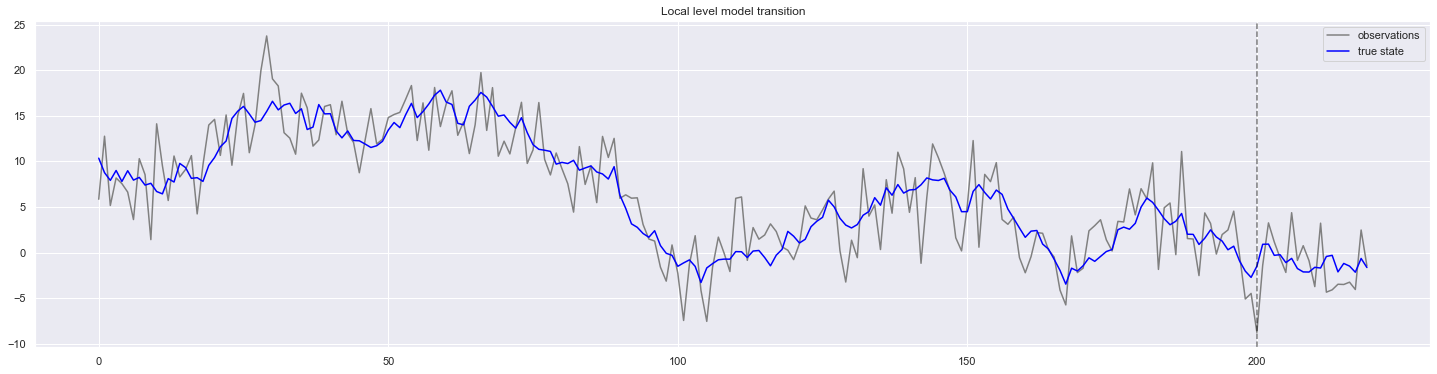

In [3]:
# 観測値と状態変数の図示
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(yt, color="grey", label="observations")
ax.plot(at, color="blue", label="true state")
ax.set_title("Local level model transition")
ax.axvline(
    n, color="black", linestyle="--", alpha=0.5,
)
plt.legend(loc="best")
plt.show()

## 4. カルマンフィルタ

　時系列 $\{y_1, \dots, y_t, \dots, y_n \}$ において以下の線形ガウス状態空間モデルで議論を進める. すなわち,

$$
    \begin{align*}
        y_t &= Z_t \alpha_t + \varepsilon_t, \ &\varepsilon_t \sim N(0, H_t) \\
        \alpha_{t} &= T_t \alpha_{t-1} + R_t \eta_t, \ &\eta_t \sim N(0, Q_t)
    \end{align*}
$$

である. カルマンフィルタリング, カルマン平滑化, カルマン予測によってそれぞれ以下を求める.

- [カルマンフィルタリング](tsa:ssm:kalman:filtering)
    - フィルタリング分布 $N(a_{t|t}, P_{t|t})$ : 
        - 平均ベクトル $a_{t|t} = {\rm E}[\alpha_t | y_{1:t}]$
        - 共分散行列 $P_{t|t} = {\rm Var}[\alpha_t | y_{1:t}]$
    - 1 期先予測分布 $N(a_t, P_t)$ : 
        - 平均ベクトル $a_t = {\rm E}[\alpha_t | y_{1:t-1}]$
        - 共分散行列 $P_t = {\rm Var}[\alpha_t | y_{1:t-1}]$
    - 1 期先予測尤度 $N(f_t, F_t)$ : 
        - 平均値 $f_t = {\rm E}[y_t | y_{1:t-1}]$
        - 分散 $F_t = {\rm Var}[y_t | y_{1:t-1}]$
- [カルマン予測](tsa:ssm:kalman:forecasting)
    - $k$ 期先予測分布 $N(a_{t+k}, P_{t+k})$ :
        - 平均ベクトル $a_{t+k} = {\rm E}[\alpha_{t+k} | y_{1:t}]$
        - 共分散行列 $P_{t+k} = {\rm Var}[\alpha_{t+k} | y_{1:t}]$
- [カルマン平滑化](tsa:ssm:kalman:smoothing)
    - 平滑化分布 $N(s_t, S_t)$ :
        - 平均ベクトル $s_{t} = {\rm E}[\alpha_{t} | y_{1:n}]$
        - 共分散行列 $S_{t} = {\rm Var}[\alpha_{t} | y_{1:n}]$


(tsa:ssm:kalman:filtering)=
### 4.1 命題 (カルマンフィルタリング) 

<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        カルマンフィルタリング
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　$\alpha_{t-1} | y_{1:t-1} \sim N(a_{t-1|t-1}, P_{t-1|t-1})$ が所与のときに, 以下の手順で逐次的に状態変数を更新することを**カルマンフィルタリング** (Kalman filtering) という.

(a) $y_{1:t-1}$ が与えられた下での $\alpha_t$ の 1 期先予測値 $a_t$, 1 期先予測誤差分散 $P_t$ は以下で求める.
    
$$
    \begin{align*}
        a_{t} &= T_{t} a_{t-1|t-1} \\
        P_{t} &= T_{t} P_{t-1 | t-1} T_{t}' + R_{t} Q_{t} R_{t}'
    \end{align*}
$$

    
(b) $y_{1:t-1}$ が与えられた下での 1 期先予測尤度平均 $f_t$, 1 期先予測誤尤度分散 $F_t$ は以下で求める.
    
$$
    \begin{align*}
        f_{t} &= Z_t a_t \\
        F_{t} &= Z_t P_t Z_t' + H_t
    \end{align*}
$$

    
(c) $y_{1:t}$ が与えられた下でのフィルタリング平均 $a_{t|t}$, フィルタリング分散 $P_{t|t}$ は以下で求める.
    
$$
    \begin{align*}
        a_{t|t} &= a_t + K_t (y_t - f_t) \\
        P_{t|t} &= P_t - K_t F_t K_t'
    \end{align*}
$$

ただし, $K_t = P_t Z_t' F_t^{-1}$ とし **カルマンゲイン** (Kalman gain) と呼ぶ.
    
</div>

<u>証明</u>

　1 期先予測分布 $N(a_t, P_t)$ について[全期待値則](dist:mdist:marginal-conditional:total-exp-var), [状態のマルコフ性](tsa:ssm:definition:definition:markov) より

$$
    \begin{align*}
        a_{t} &= {\rm E}(\alpha_{t} | y_{1:t-1}) \\
              &= {\rm E}( {\rm E} ( \alpha_{t} | \alpha_{t-1}, y_{1:t-1} ) | y_{1:t-1}) \quad (\because \ 全期待値則) \\
              &= {\rm E}( {\rm E} ( \alpha_{t} | \alpha_{t-1} ) | y_{1:t-1}) \quad (\because \ 状態のマルコフ性) \\
              &= {\rm E}( T_{t} \alpha_{t-1} | y_{1:t-1}) \\
              &= T_{t} a_{t-1|t-1}
    \end{align*}
$$

分散については[全分散則](dist:mdist:marginal-conditional:total-exp-var), [状態のマルコフ性](tsa:ssm:definition:definition:markov) より

$$
    \begin{align*}
        P_{t} &= {\rm Var}(\alpha_{t} | y_{1:t-1}) \\
              &= {\rm E}( {\rm Var} ( \alpha_{t} | \alpha_{t-1}, y_{1:t-1} ) | y_{1:t-1}) + {\rm Var}( {\rm E} ( \alpha_{t} | \alpha_{t-1}, y_{1:t-1} ) | y_{1:t-1}) \quad (\because \ 全分散則) \\
              &= {\rm E}( {\rm Var} ( \alpha_{t} | \alpha_{t-1} ) | y_{1:t-1}) + {\rm Var}( {\rm E} ( \alpha_{t} | \alpha_{t-1} ) | y_{1:t-1}) \quad (\because \ 状態のマルコフ性) \\
              &= {\rm E}( R{t} Q_{t-1} R'_{t} | y_{1:t-1}) + {\rm Var}( T_{t} \alpha_{t-1} | y_{1:t-1}) \\
              &= R_{t} Q_{t} R_{t}' + T_{t} P_{t-1 | t-1} T_{t}'
    \end{align*}
$$

と分かる. 1 期先予測尤度について $N(f_t, F_t)$ も同様に計算して導出できる.

$$
    \begin{align*}
        f_{t} &= {\rm E}(y_{t} | y_{1:t-1}) \\
              &= {\rm E}( {\rm E} ( y_{t} | \alpha_{t}, y_{1:t-1} ) | y_{1:t-1}) \quad (\because \ 全期待値則) \\
              &= {\rm E}( {\rm E} ( y_{t} | \alpha_{t} ) | y_{1:t-1}) \quad (\because \ 状態空間モデルにおける条件付独立性) \\
              &= {\rm E}( Z_{t} \alpha_{t} | y_{1:t-1}) \\
              &= Z_{t} a_{t}
    \end{align*}
$$

および

$$
    \begin{align*}
        F_{t} &= {\rm Var}(y_{t} | y_{1:t-1}) \\
              &= {\rm E}( {\rm Var} ( y_{t} | \alpha_{t}, y_{1:t-1} ) | y_{1:t-1}) + {\rm Var}( {\rm E} ( y_{t} | \alpha_{t}, y_{1:t-1} ) | y_{1:t-1}) \quad (\because \ 全分散則) \\
              &= {\rm E}( {\rm Var} ( y_{t} | \alpha_{t} ) | y_{1:t-1}) + {\rm Var}( {\rm E} ( y_{t} | \alpha_{t} ) | y_{1:t-1}) \quad (\because \ 状態空間モデルにおける条件付独立性) \\
              &= {\rm E}( H_t | y_{1:t-1}) + {\rm Var}( Z_t \alpha_{t} | y_{1:t-1}) \\
              &= H_{t} + Z_t P_t Z_t'.
    \end{align*}
$$

最後にフィルタリング分布 $N(a_{t|t}, P_{t|t})$ について[一般の状態空間モデルの逐次求解におけるフィルタリング分布漸化式](tsa:ssm:recursive:filtering)から

$$
    \begin{align*}
        f(\alpha_t | y_{1:t}) 
            &\propto f(y_t | \alpha_t) f(\alpha_t | y_{1:t-1}) \\
            &\sim N(Z_t \alpha_t, H_t) N(a_t, P_t)
    \end{align*}
$$

より[ベイズ線形回帰の事後分布における平均ベクトル, 分散行列]()から $K_t = P_t Z_t' F_t^{-1}$ として

$$
    \begin{align*}
        a_{t|t} 
            &= a_t + P_t Z_t' (Z_t P_t Z'_t + H_t)^{-1} (y_t - Z_t a_t) \\
            &= a_t + P_t Z_t' F^{-1}_t (y_t - f_t) \\
            &= a_t + K_t (y_t - f_t)
    \end{align*}
$$

$$
    \begin{align*}
        P_{t|t} 
            &= P_t + P_t Z_t' (Z_t P_t Z'_t + H_t)^{-1} Z_t P_t \\
            &= P_t + P_t Z_t' F^{-1}_t F_t F^{-1}_t Z_t P_t \\
            &= P_t + K_t F_t K_t'.
    \end{align*}
$$

### 4.2 例 (python によるカルマンフィルタの実装)

　上記で求めた更新式をそのままコーディングするだけで実施可能なので技術的にはかなり容易.

In [4]:
def kalman_filter(at, Pt, yt, Zt, Tt, Rt, Ht, Qt):
    """Kalman filter
    
    Parameters
    ----------
    at : 
    Pt :
    yt :
    Zt :
    Rt :
    Ht :
    Qt :
    
    Return
    ------
    at1 : 
    Pt1 :
    
    """
    # (a) one-step ahead predictor of a_t, P_t
    a_ahead = Tt @ at
    P_ahead = Tt @ Pt @ Tt.T + Rt @ Qt @ Rt.T

    # (b) one-step predictor on the error for y_t
    f = Zt @ a_ahead
    F = Zt @ P_ahead @ Zt.T + Ht

    # Kalman gain
    K = P_ahead @ Zt.T @ np.linalg.inv(F)

    # (c) filtered a_{t+1}, P_{t+1}
    a_next = a_ahead + K @ (yt - f)
    P_next = P_ahead - K @ F @ K.T
    return a_next, P_next

In [5]:
a0 = np.array([0])
P0 = np.array([1e7])

a_filtered = np.zeros((n, 1))
P_filtered = np.zeros((n, 1, 1))

for t in range(n):
    if t == 0:
        a_filtered[t], P_filtered[t] = kalman_filter(
            a0, P0, yt=yt[t : t + 1], Zt=Zt, Tt=Tt, Rt=Rt, Ht=Ht, Qt=Qt
        )
    else:
        a_filtered[t], P_filtered[t] = kalman_filter(
            a_filtered[t - 1 : t],
            P_filtered[t - 1 : t],
            yt=yt[t : t + 1],
            Zt=Zt,
            Tt=Tt,
            Rt=Rt,
            Ht=Ht,
            Qt=Qt,
        )

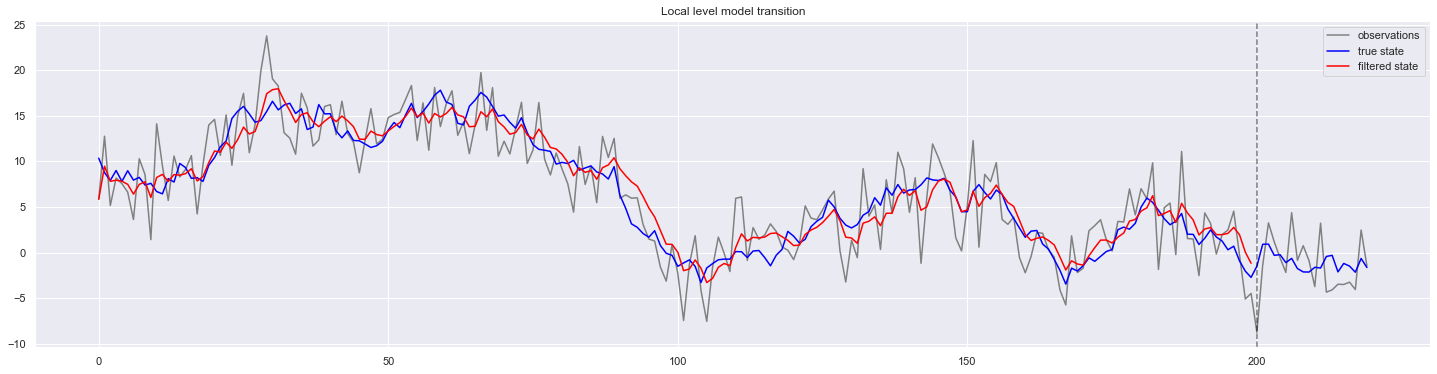

In [6]:
# 観測値と状態変数の図示
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(yt, color="grey", label="observations")
ax.plot(at, color="blue", label="true state")
ax.plot(a_filtered, color="red", label="filtered state")
ax.set_title("Local level model transition")
ax.axvline(
    n, color="black", linestyle="--", alpha=0.5,
)
plt.legend(loc="best")
plt.show()

(tsa:ssm:kalman:forecasting)=
### 4.3 命題 (カルマン予測) 

<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        カルマン予測
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　$k-1$ 期先予測分布 $N(a_{t+k-1}, P_{t+k-1})$ が所与のときに, 以下の手順で逐次的に状態変数を更新することを**カルマン予測** (Kalman forecasting) という.

$$
    \begin{align*}
        a_{t+k} &= T_{t+k} a_{t+k-1} \\
        P_{t+k} &= R_{t+k} Q_{t+k} R_{t+k}' + T_{t+k} P_{t+k-1} T_{t+k}'
    \end{align*}
$$
    
</div>

<u>証明</u>

　$k$ 期先予測分布 $N(a_{t+k}, P_{t+k})$ について[全期待値則](dist:mdist:marginal-conditional:total-exp-var), [状態のマルコフ性](tsa:ssm:definition:definition:markov) より

$$
    \begin{align*}
        a_{t+k} 
            &= {\rm E}(\alpha_{t+k} | y_{1:t}) \\
            &= {\rm E}( {\rm E} ( \alpha_{t+k} | \alpha_{t+k-1}, y_{1:t} ) | y_{1:t}) \quad (\because \ 全期待値則) \\
            &= {\rm E}( {\rm E} ( \alpha_{t+k} | \alpha_{t+k-1} ) | y_{1:t}) \quad (\because \ 状態のマルコフ性) \\
            &= {\rm E}( T_{t+k} \alpha_{t+k-1} | y_{1:t}) \\
            &= T_{t+k} a_{t+k-1}
    \end{align*}
$$

分散については[全分散則](dist:mdist:marginal-conditional:total-exp-var), [状態のマルコフ性](tsa:ssm:definition:definition:markov) より

$$
    \begin{align*}
        P_{t+k} 
            &= {\rm Var}(\alpha_{t+k} | y_{1:t}) \\
            &= {\rm E}( {\rm Var} ( \alpha_{t+k} | \alpha_{t+k-1}, y_{1:t} ) | y_{1:t}) + {\rm Var}( {\rm E} ( \alpha_{t+k} | \alpha_{t+k-1}, y_{1:t} ) | y_{1:t}) \quad (\because \ 全分散則) \\
            &= {\rm E}( {\rm Var} ( \alpha_{t+k} | \alpha_{t+k-1} ) | y_{1:t}) + {\rm Var}( {\rm E} ( \alpha_{t+k} | \alpha_{t+k-1} ) | y_{1:t}) \quad (\because \ 状態のマルコフ性) \\
            &= {\rm E}( R{t+k} Q_{t+k-1} R'_{t+k} | y_{1:t}) + {\rm Var}( T_{t+k} \alpha_{t+k-1} | y_{1:t}) \\
            &= R_{t+k} Q_{t+k} R_{t+k}' + T_{t+k} P_{t+k-1} T_{t+k}'.
    \end{align*}
$$


### 4.4 例 (python によるカルマン予測の実装)

　上記で求めた更新式を実装する.

In [7]:
def kalman_forecastor(a, P, Tt, Rt, Qt):
    a_ahead = Tt @ a
    P_ahead = Rt @ Qt @ Rt.T + Tt @ P @ Tt.T
    return a_ahead, P_ahead

In [8]:
a_pred = np.zeros((k, 1))
P_pred = np.zeros((k, 1, 1))

for t in range(k):
    if t == 0:
        a = Tt @ a_filtered[n - 1 : n]
        P = Tt @ P_filtered[n - 1 : n] @ Tt.T + Rt @ Qt @ Rt.T
        a_pred[t] = a
        P_pred[t] = P
    else:
        a_pred[t], P_pred[t] = kalman_forecastor(
            a_pred[t - 1], P_pred[t - 1], Tt=Tt, Rt=Rt, Qt=Qt
        )

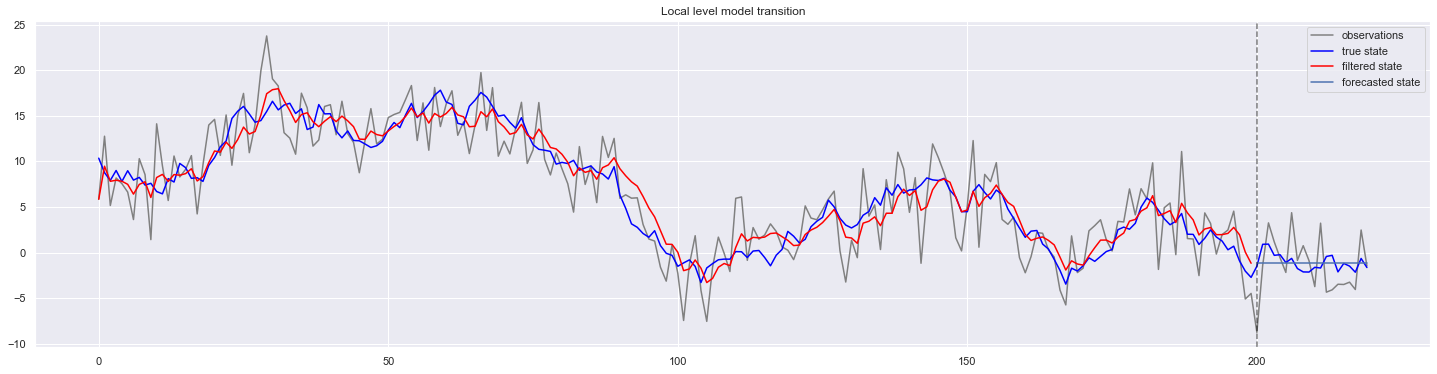

In [9]:
# 観測値と状態変数の図示
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(yt, color="grey", label="observations")
ax.plot(at, color="blue", label="true state")
ax.plot(a_filtered, color="red", label="filtered state")
ax.plot(np.arange(n, n + k), a_pred, label="forecasted state")
ax.set_title("Local level model transition")
ax.axvline(
    n, color="black", linestyle="--", alpha=0.5,
)
plt.legend(loc="best")
plt.show()

(tsa:ssm:kalman:smoothing)=
### 4.5 命題 (カルマン平滑化) 

<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        カルマン平滑化
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 10px 10px 0 10px; margin-bottom: 10px;">

　$t+1$ 期先予測分布 $N(s_{t+1}, S_{t+1})$ が所与のときに, 以下の手順で逐次的に状態変数を更新することを**カルマン平滑化** (Kalman smoothing) という.

$$
    \begin{align*}
        s_{t} &= a_{t|t} + A_{t} (s_{t+1} - a_{t+1}) \\
        S_{t} &= P_{t|t} + A_t (S_{t+1} - P_{t+1}) A_t'
    \end{align*}
$$

ただし, $A_t = P_{t|t}T_{t+1}'P_{t+1}^{-1}$ とし**平滑化利得** (smoothing gain) と呼ぶ.
    
</div>

<u>証明</u>

　平滑化分布 $N(s_{t}, S_{t})$ について[全期待値則](dist:mdist:marginal-conditional:total-exp-var), [状態空間モデルの条件付独立性](tsa:ssm:definition:definition:cond-independent) より

$$
    \begin{align*}
        s_{t} 
            &= {\rm E}(\alpha_{t} | y_{1:n}) \\
            &= {\rm E}( {\rm E} ( \alpha_{t} | \alpha_{t+1}, y_{1:n} ) | y_{1:n}) \quad (\because \ 全期待値則) \\
            &= {\rm E}( {\rm E} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} ) | y_{1:n}) \quad (\because \ 条件付独立性)
    \end{align*}
$$

となる. ここで $\alpha_{t} | \alpha_{t+1}, y_{1:t}$ の分布を考えると, [乗法定理](conditional_distribution), [状態のマルコフ連鎖性](tsa:ssm:definition:definition:markov) から

$$
    \begin{align*}
        f(\alpha_{t} | \alpha_{t+1}, y_{1:t})
            &= \frac{ f(\alpha_{t}, \alpha_{t+1} | y_{1:t}) }{ f(\alpha_{t+1} | y_{1:t}) } \quad (\because \ 乗法定理) \\
            &\propto f(\alpha_{t}, \alpha_{t+1} | y_{1:t}) \\
            &= f(\alpha_{t+1} | \alpha_{t}, y_{1:t} ) f(\alpha_{t} | y_{1:t}) \quad (\because \ 乗法定理) \\
            &= f(\alpha_{t+1} | \alpha_{t} ) f(\alpha_{t} | y_{1:t}) \quad (\because \ 状態のマルコフ性) \\
            &\sim N(T_{t+1} \alpha_{t}, R_{t+1}Q_{t+1}R_{t+1}' ) N(a_{t|t}, P_{t|t})
    \end{align*}
$$

となるので[ベイズ線形回帰の事後分布における平均ベクトル, 分散行列]()から $A_t = P_{t+1} T_{t+1}' P_{t+1}^{-1}$ として

$$
    \begin{align*}
        {\rm E} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} )
            &= a_{t|t} + P_{t|t} T_{t+1}' (T_{t+1} P_{t|t} T_{t+1}' + R_{t+1}Q_{t+1}R_{t+1}' )^{-1}(\alpha_{t+1} - T_{t+1} a_{t|t} ) \\
            &= a_{t|t} + P_{t|t} T_{t+1}' P_{t+1}^{-1}(\alpha_{t+1} - T_{t+1} a_{t|t} ) \\
            &= a_{t|t} + A_{t} (\alpha_{t+1} - T_{t+1} a_{t|t} )
    \end{align*}
$$

ゆえに

$$
    \begin{align*}
        s_{t}
            &= {\rm E}( {\rm E} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} ) | y_{1:n}) \\
            &= {\rm E}( a_{t|t} + A_{t} (\alpha_{t+1} - T_{t+1} a_{t|t} ) | y_{1:n}) \\
            &= a_{t|t} + A_{t} (s_{t+1} - a_{t+1} ).
    \end{align*}
$$

また $S_t$ について

$$
    \begin{align*}
        S_{t} 
            &= {\rm Var}(\alpha_{t} | y_{1:n}) \\
            &= {\rm E}( {\rm Var} ( \alpha_{t} | \alpha_{t+1}, y_{1:n} ) | y_{1:n}) + {\rm Var}( {\rm E} ( \alpha_{t} | \alpha_{t+1}, y_{1:n} ) | y_{1:n}) \quad (\because \ 全分散則) \\
            &= {\rm E}( {\rm Var} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} ) | y_{1:n}) + {\rm Var}( {\rm E} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} ) | y_{1:n}) \quad (\because \ 条件付独立性)
    \end{align*}
$$

${\rm Var} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} )$ について $s_t$ で行った分布の議論より

$$
    \begin{align*}
        {\rm Var} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} )
            &= P_{t|t} + P_{t|t} T_{t+1}' (T_{t+1} P_{t|t} T_{t+1}' + R_{t+1}Q_{t+1}R_{t+1}' )^{-1} T_{t+1} P_{t|t}' \\
            &= P_{t|t} + P_{t|t} T_{t+1}' P_{t+1}^{-1} T_{t+1} P_{t|t}' \\
            &= P_{t|t} + A_t P_{t+1} A_t'
    \end{align*}
$$

となるので

$$
    \begin{align*}
        S_{t} 
            &= {\rm E}( {\rm Var} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} ) | y_{1:n}) + {\rm Var}( {\rm E} ( \alpha_{t} | \alpha_{t+1}, y_{1:t} ) | y_{1:n}) \\
            &= {\rm E}( P_{t|t} + A_t P_{t+1} A_t' | y_{1:n}) + {\rm Var}( a_{t|t} + A_{t} (\alpha_{t+1} - T_{t+1} a_{t|t} ) | y_{1:n}) \\
            &= P_{t|t} - A_t P_{t+1} A_t' + A_t S_{t+1} A_t' \\
            &= P_{t|t} + A_t (S_{t+1} - P_{t+1}) A_t'.
    \end{align*}
$$

### 4.6 例 (python によるカルマン平滑化の実装)

　上記で求めた更新式を実装する.

In [10]:
def kalman_smoother(s, S, at, Pt, Tt, Rt, Qt):
    a = Tt @ at
    P = Rt @ Qt @ Rt.T + Tt @ Pt @ Tt.T

    A = Pt @ Tt.T @ np.linalg.inv(P)

    s_back = at + A @ (s - a)
    S_back = Pt + A @ (S - P) @ A.T

    return s_back, S_back

In [11]:
s = np.zeros((n, 1))
S = np.zeros((n, 1, 1))

for t in range(n):
    t = n - t - 1
    if t == n - 1:
        s[t] = a_filtered[t]
        S[t] = P_filtered[t]
    else:
        s[t], S[t] = kalman_smoother(
            s[t + 1], S[t + 1], a_filtered[t], P_filtered[t], Tt=Tt, Rt=Rt, Qt=Qt
        )

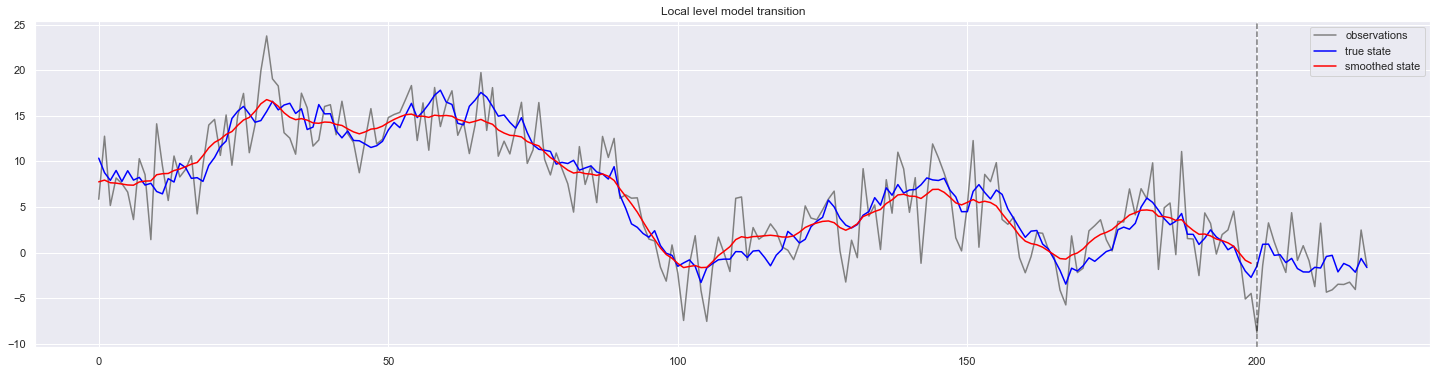

In [12]:
# 観測値と状態変数の図示
fig, ax = plt.subplots(figsize=(25, 6))
ax.plot(yt, color="grey", label="observations")
ax.plot(at, color="blue", label="true state")
# ax.plot(a_filtered, color="red", label="filtered state")
ax.plot(s, color="red", label="smoothed state")
ax.set_title("Local level model transition")
ax.axvline(
    n, color="black", linestyle="--", alpha=0.5,
)
plt.legend(loc="best")
plt.show()

今まで書いたカルマンフィルタを一つに集約する.

In [13]:
# in progress
class KalmanFilter:
    def __init__(a0, P0, Zt, Tt, Rt, Ht, Qt):
        self.a0 = a0
        self.P0 = P0
        self.Zt = Zt
        self.Tt = Tt
        self.Rt = Rt
        self.Ht = Ht
        self.Qt = Qt

    def _filter(self):
        raise NotImplementedError

    def _smoother(self):
        raise NotImplementedError

    def _forecastor(self):
        raise NotImplementedError